In [1]:
# import packages

import pickle, pprint
import numpy as np
import collections
import sys
sys.path.insert(0, '../cell_soap/')
from cell_describe import node, edge, cell, colony, data, multiple_time

pkl_file = open('zo1_graph_timelapse_sample_v2.pkl','rb')
data1 = pickle.load(pkl_file)

In [2]:
test = multiple_time(data1, 10)

LinAlgError: Matrix is singular.

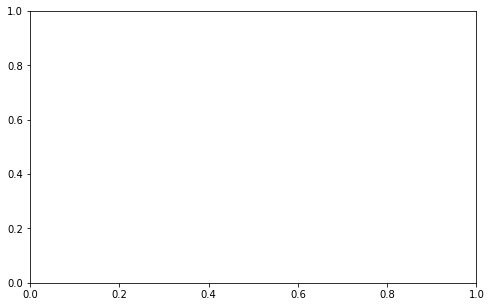

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (8,5))
test.plot(ax, fig,30, 1)

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (8,5))
test.CreateMovie(ax, fig, 10, 1, 10)

../cell_soap/cell_describe.py:599: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.289866e-19
  x = linalg.solve(R2, y) # Solve Rx=y
../cell_soap/cell_describe.py:599: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.448204e-18
  x = linalg.solve(R2, y) # Solve Rx=y
../cell_soap/cell_describe.py:599: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.172696e-18
  x = linalg.solve(R2, y) # Solve Rx=y
../cell_soap/cell_describe.py:599: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.875968e-19
  x = linalg.solve(R2, y) # Solve Rx=y


<Figure size 576x360 with 0 Axes>

# Load data structure at specified time

In [2]:
#Time step , checked - > t = 12, cut = 4, t=21, cut = 30
t = 0
V = data(data1, t)

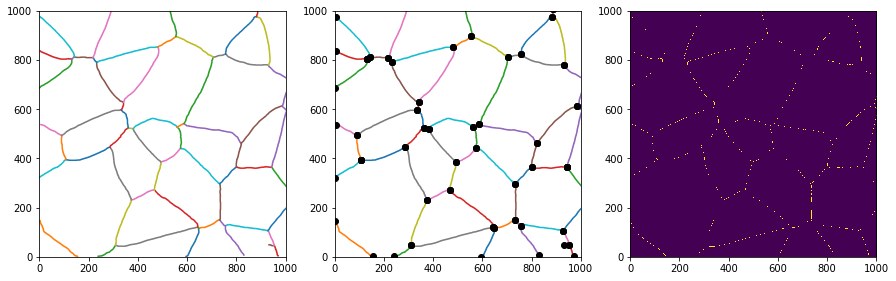

In [3]:
# Plot 
import matplotlib.pyplot as plt
fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize = (15,5))
V.plot(ax, "edge", None)
V.plot(ax1, "edge_and_node", None)
V.plot(ax2, "image", None)

# Clean up overlapping nodes within small cutoff

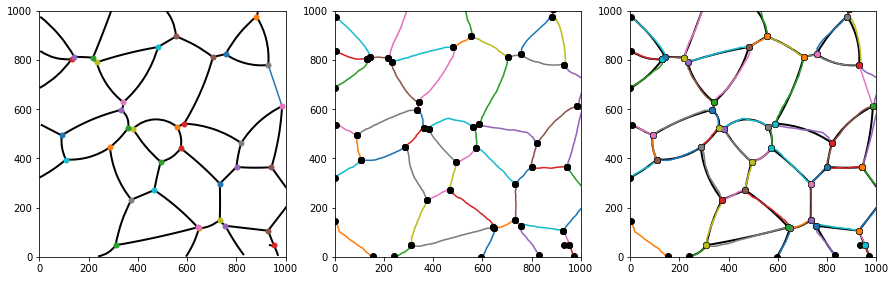

In [4]:
# Cutoff
cutoff = 1
nodes, edges = V.post_processing(cutoff, None)
fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize = (15,5))

V.plot(ax1, "edge_and_node", None)
V.plot(ax2, "edge_and_node", None)

for a in (ax, ax2):
    a.set(xlim = [0,1000], ylim = [0,1000], aspect = 1)
    [e.plot(a, lw = 2 ) for e in edges]
    [n.plot(a, markersize = 10) for n in nodes]


In [5]:
# Check repeats
print([item for item, count in collections.Counter(nodes).items() if count > 1])
print([item for item, count in collections.Counter(edges).items() if count > 1])

[]
[]


In [6]:
np.array([len(n.edges) for n in nodes]).T

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# Find cells

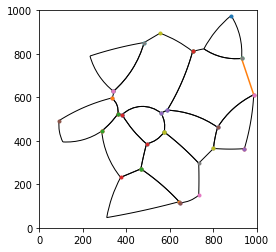

In [7]:
# Find cells

cells = []
max_iter = 100

for e in edges:
    cell = e.which_cell(edges, 1, max_iter)
    check = 0
    if cell != []:
        for c in cells:
            if set(cell.edges) == set(c.edges):
                check = 1
        if check == 0:
            cells.append(cell)

    cell = e.which_cell(edges, 0, max_iter)
    check = 0
    if cell != []:
        for c in cells:
            if set(cell.edges) == set(c.edges):
                check = 1
        if check == 0:
            cells.append(cell)

fig, ax = plt.subplots(1,1)
ax.set_aspect(1)
ax.set(xlim = [0,1000], ylim = [0,1000])
[c.plot(ax) for c in cells]
plt.show()

# Calculate tension and pressure

In [8]:
# Define colony and calculate tension. Then use that to find pressure

from cell_describe import colony 

edges2 = [e for e in edges if e.radius is not None]
col1 = colony(cells, edges2, nodes)

# A and B are the matrices. Tensions and pressures are values for each edge and cell respectively 

tensions, P_T = col1.calculate_tension()

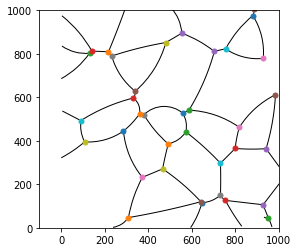

In [9]:
edges2 = [e for e in edges if e.radius is not None]
fig, ax = plt.subplots(1,1)
ax.set_aspect(1)
ax.set(xlim = [-100,1000], ylim = [0,1000])
[e.plot(ax) for e in edges2]
[e.plot(ax, markersize = 10) for e in nodes]

plt.show()

In [10]:
# Check none of the radius is None
print([e.radius for e in edges2])

[401.91646236032165, 108.64355574371099, 277.57608064099014, 888.9345500255545, 33.71911773600865, 311838.5734784411, 3696.896202575813, 624.1062905051629, 1832727.8386000504, 505015.62237910804, 147.27843788468098, 69828.72567596752, 1016.0624485309054, 78.9697317541966, 2351.593041946219, 470384.1599874154, 394.5349398057314, 1662.950137154924, 1304.771710070059, 2035914.9957983156, 3997.048504068563, 974.6120838001568, 1062.1570809243074, 505.690402470005, 131.87917029899143, 544.0446453330536, 603.8596821579721, 286.2807952790002, 177.51481407580528, 121.0646599373184, 398.390705173256, 437.9107903746378, 410.99049673347207, 434783.13606153324, 825.7626794795518, 178327.37216113994, 133.1739429703808, 76.44062366370834, 547.3774017680614, 1053.9930523244464, 45.50323917870691, 315.19471522954683, 464.72801178420195, 259.47866891245974, 319.2565087052824, 1699.2170113727257, 45.07050009572723, 391.93290941442973, 191.70139623692137, 55.753807607095204, 1018.2290245050341, 4489.14077

In [11]:
pressures, P_P = col1.calculate_pressure(tensions)

In [12]:
tensions

array([ 0.63560334,  0.79127397,  0.74593627,  0.41723299,  0.09820714,
        0.69356842,  0.20388644,  0.6866223 ,  0.6076297 ,  0.69105536,
        0.65251307,  0.79382558,  0.72248297,  0.83389064,  1.00349828,
        0.74156174,  0.32113869,  0.79734332,  0.58202368,  0.59800966,
        0.53979018,  0.42734019,  0.47275328,  0.29313656,  0.9671547 ,
        0.98379725,  2.22295823,  2.38242564,  1.93018307,  1.07099344,
        2.35089367,  0.12789996,  0.06894585,  1.87260107,  2.30190213,
        1.13938852,  1.05031502,  1.83937292,  0.51596805,  0.65316233,
        1.72111564, -0.50762728,  1.47543699,  0.9394687 ,  0.49489899,
        0.52555537,  1.0885195 ,  1.90961644,  0.87809268,  0.76761597,
        1.46826987,  1.53679906,  1.8476666 ,  0.94343727,  1.11541495,
        1.21674106,  0.82285379,  1.47235224,  1.14320645,  1.13322812,
        2.24636685,  1.93268512])

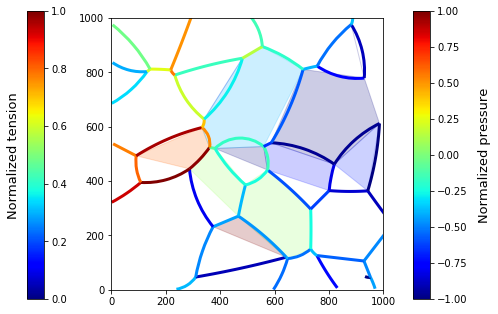

In [27]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))
col1.plot(ax, fig, tensions, pressures)
pylab.savefig('0000{0}.png'.format(0), dpi=200)

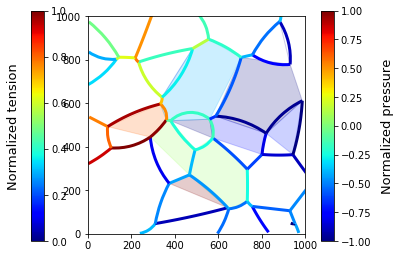

In [25]:

fig, ax = plt.subplots(1,1)
line = col1.plot(ax, fig, tensions, pressures)

In [21]:
frames = []
frames.append(line)

In [24]:
line

Saving frame _tmp000.png
Saving frame _tmp001.png
Saving frame _tmp002.png
Saving frame _tmp003.png
Saving frame _tmp004.png
Saving frame _tmp005.png
Saving frame _tmp006.png
Saving frame _tmp007.png
Saving frame _tmp008.png
Saving frame _tmp009.png
Saving frame _tmp010.png
Saving frame _tmp011.png
Saving frame _tmp012.png
Saving frame _tmp013.png
Saving frame _tmp014.png
Saving frame _tmp015.png
Saving frame _tmp016.png
Saving frame _tmp017.png
Saving frame _tmp018.png
Saving frame _tmp019.png
Saving frame _tmp020.png
Saving frame _tmp021.png
Saving frame _tmp022.png
Saving frame _tmp023.png
Saving frame _tmp024.png
Saving frame _tmp025.png
Saving frame _tmp026.png
Saving frame _tmp027.png
Saving frame _tmp028.png
Saving frame _tmp029.png
Saving frame _tmp030.png
Saving frame _tmp031.png
Saving frame _tmp032.png
Saving frame _tmp033.png
Saving frame _tmp034.png
Saving frame _tmp035.png
Saving frame _tmp036.png
Saving frame _tmp037.png
Saving frame _tmp038.png
Saving frame _tmp039.png


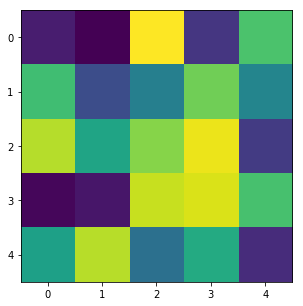

In [12]:
from __future__ import print_function

import os
import subprocess
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


files = []

fig, ax = plt.subplots(figsize=(5, 5))
for i in range(50):  # 50 frames
    plt.cla()
    plt.imshow(np.random.rand(5, 5), interpolation='nearest')
    fname = '_tmp%03d.png' % i
    print('Saving frame', fname)
    plt.savefig(fname)
    files.append(fname)

print('Making movie animation.mpg - this may take a while')
subprocess.call("mencoder 'mf://_tmp*.png' -mf type=png:fps=10 -ovc lavc "
                "-lavcopts vcodec=wmv2 -oac copy -o animation.mpg", shell=True)

# cleanup
for fname in files:
    os.remove(fname)